In [3]:
# cara 1
# Import library yang dibutuhkan
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score,accuracy_score

# Load dataset
dataset = pd.read_csv('hasilsemualabel-Copy1.csv')
dataset.head(5)


,Unnamed: 0,id,username,text,retweet_count,like_count,created_at,label
0,0,1622796454040604672,awesomeposted,21. https://t.co/MdCMFIwl4x\n22. https://t.co/...,0,0,2023-02-07 03:16:39+00:00,1
1,1,1622796208619294722,awesomeposted,https://t.co/LOMaQtc0dO,0,0,2023-02-07 03:15:40+00:00,1
2,2,1622765781862780928,awesomeposted,RT @awesomeposted: RUMAH SUBSIDI BARANG ELIT \...,140,0,2023-02-07 01:14:46+00:00,1
3,3,1622765716624805890,awesomeposted,RT @awesomeposted: Barang Yg Bisa Menghemat Bu...,288,0,2023-02-07 01:14:31+00:00,1
4,4,1622765685037465600,awesomeposted,RT @awesomeposted: SELF REWARD GA MESTI MAHAL ...,240,0,2023-02-07 01:14:23+00:00,1


In [13]:
# Pre-processing data
# Membersihkan data dari karakter-karakter yang tidak diinginkan
dataset['text'] = dataset['text'].apply(lambda x: ' '.join([word for word in x.split() if not word.startswith('@')])) 
dataset['text'] = dataset['text'].str.replace('[^a-zA-Z0-9\s]', '',regex=True) 

# Melakukan tokenisasi dan stemming
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(dataset['text'])
y = dataset['label']
y.head(5)


0    1
1    1
2    1
3    1
4    1
Name: label, dtype: int64

In [20]:
# Membuat model Random Forest Classifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)
model = RandomForestClassifier(n_estimators=100, max_features='sqrt', max_depth=10, random_state=42)
model.fit(X_train, y_train)
# X_train.shape, X_test.shape
# X_train.dtype
y_pred = model.predict(X_test)
classifier = X_test


print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with 10 decision-trees : 0.6470


In [21]:
# classifier = RandomForestClassifier(n_estimators=100, random_state=0)
classifier = RandomForestClassifier(random_state=0)
classifier.fit(X_train, y_train)

# Membangun model Random Forest Classifier dan mencari important features 
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

# print(X_train)
dframe = pd.DataFrame(X_train)
dframe.head()


,0
0,"(0, 4174)\t0.29184674484242373\n (0, 8908)\..."
1,"(0, 8566)\t1.0"
2,"(0, 7190)\t1.0"
3,"(0, 2524)\t0.3832108899716628\n (0, 6249)\t..."
4,"(0, 8201)\t0.28638682667223075\n (0, 1910)\..."


In [38]:
# feature_scores = pd.Series(rfc.feature_importances_, index=X_train).sort_values(ascending=False)
# feature_scores()
importances = rfc.feature_importances_
# for feature, importance in zip(X_train, importances):
    # print(feature,':', importances)


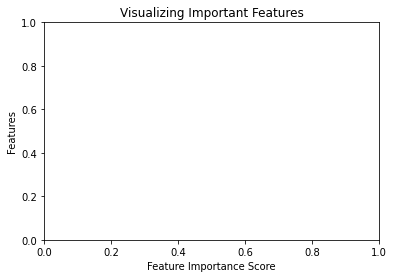

Confusion Matrix:
[[516  35]
 [271 229]]
Accuracy: 0.708848715509039
Precision: 0.8674242424242424
Recall: 0.458
F1 Score: 0.599476439790576


In [40]:
import seaborn as sns 
# sns.barplot(x=feature_scores, y=feature_scores.index)
# Add labels to the graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')

# Add title to the graph

plt.title("Visualizing Important Features")

# Visualize the graph

plt.show()

# Memprediksi data testing
y_pred = rfc.predict(X_test)
y_pred = classifier.predict(X_test)
accuracy = (y_pred == y_test).mean()

# Evaluasi model
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('Accuracy:', accuracy)
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1 Score:', f1_score(y_test, y_pred))